<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Regression Metrics

_Authors: Matt Brems (DC), Dave Yerrington (SF), Riley Dallas (AUS)_


> All models are wrong, but some are useful.
>
> -- <cite>George EP Box</cite>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression

%matplotlib inline

## Load the Data
---

Today's dataset (`Advertising.csv`) is from the [ISLR](http://www-bcf.usc.edu/~gareth/ISL/) website.

Drop `"Unnamed: 0"` once you've loaded the CSV into a DataFrame.

In [2]:
df = pd.read_csv('../datasets/Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.drop(columns='Unnamed: 0', inplace=True)

## Data Cleaning
---

Run the following checks in the cells provided:

- Are there any null values (`NaN`)?
- Are there any corrupted columns?



In [4]:
# Check for nulls
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [5]:
# Check datatypes for any corrupted columns
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

## Create our feature matrix (`X`) and target vector (`y`)
---

The following columns will be our features:

- `'TV'`
- `'radio'`
- `'newspaper'`

The `sales` column is our label: the column we're trying to predict.

In the cell below, create your `X` and `y` variables.

In [6]:
features = ['TV', 'radio', 'newspaper']
X = df[features]
y = df['sales']

## Linear Regression model
---

In the cell below, create an instance of `LinearRegression`.

In [7]:
lr = LinearRegression()

## Fitting the model
---

The `.fit()` method is how our model will learn the coefficients for each of the features (`'TV'`, `'radio'` and `'newspaper'`).

Once it's fit, you can see the bias (aka intercept) and coefficients are by running:

```python
model.coef_
model.intercept_
```

In [8]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
lr.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [10]:
lr.intercept_

2.9388893694594067

## Making predictions
---

To get predictions from our model, all we have to do is run `.predict(X_to_predict)`. This will return a list (`np` array) of predictions, one for each row in our `X_to_predict`. Normally you'll use this method for making predictions on unseen data, but today we'll be evaluating the data that was fed into the model during `.fit()`.

In [11]:
predictions = lr.predict(X)

## Residuals
---

Recall the formula for linear regression:

#### $ Y = \beta_0 + \beta_1 X_1 + \varepsilon$

It's important to remember that $\varepsilon$ represents the irreducible error. Irreducible error is the error we'll never be able to solve. $\varepsilon$ has a few important properties that we want our residuals to mimic:

1. It is random (ie no discernible pattern)
2. It has a mean of zero. Stated differently, our model should be just as likely to undershoot a prediction as it is to overshoot.

In the cells below, do the following:

1. Create your residuals: `y - y_hat`
2. Calculate the mean of your residuals

In [12]:
residuals = y - predictions

In [13]:
residuals.mean()

-1.092459456231154e-15

## Residuals plot
---

We'll create a scatterplot to test for randomness. The `y` axis will be the residuals, and the `x` axis will be original `predictions`. 

In a residuals plot, we're looking for the following:

- Scedasticity: We want a consistent variance between our low predictions and our high predictions (homoscedasticity). If you spot the opposite (heteroscedasticity) it means your target is not normally distributed. The remedy is to run your target vector through a power transformation (e.g. [Box-Cox or Yeo-Johnson](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html))
- Outliers: If your loss function involves squaring the residuals (e.g. MSE, RMSE, R2), then outliers will have a lot of leverage over your model. One recommendation is to remove the worst offenders from your training data.

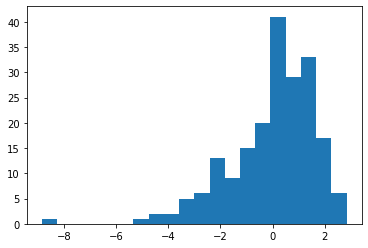

In [16]:
plt.hist(residuals,bins=20);

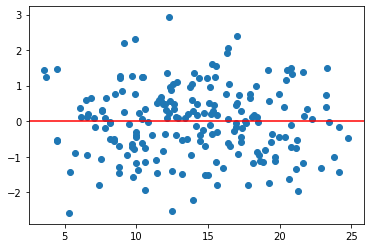

In [17]:
# Use np.random.randn to show what we expect in a residual plot
plt.scatter(predictions, np.random.randn(len(predictions)))
plt.axhline(0, color='r')

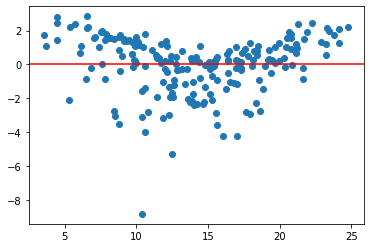

In [18]:
plt.scatter(predictions, residuals)
plt.axhline(0, color='r')

## Mean Absolute Error (MAE)
---

#### $MAE(\mathbf{y},\hat{\mathbf{y}}) = \frac{1}{n}\sum_{i=1}^n(|y_i-\hat{y}_i|)$

Goal: Get MAE as close to 0 as possible.

Pros: 
- Represents median distance from the predicted value.
- In the original units of $Y$. 
- Is not heavily affected by outliers.

Cons: 
- Depends on scale of $Y$. (i.e. housing prices vs. GPA)

In [19]:
# Calcuate MAE by hand
np.abs(residuals).mean()

1.2520112296870685

In [20]:
# Via sklearn.metrics
metrics.mean_absolute_error(y, predictions)

1.2520112296870682

## Residual Sum of Squares (RSS)
---

#### $\sum_{i=1}^n(y_i - \hat{y}_i)^2$

RSS forms the basis for several loss/optimization functions that we'll cover next:

- Mean squared error (MSE)
- Root mean squared error (RMSE)
- R2

In [21]:
# Calculate RSS by hand
rss = (residuals ** 2).sum()

## Mean Squared Error (MSE)
---

#### $MSE(\mathbf{y},\hat{\mathbf{y}}) = \frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2$

Goal: Get $MSE$ as close to 0 as possible.

Pros: 
- Very common; part of other calculations.
- Represents average distance squared from the predicted value.

Cons: 
- Can be heavily affected by outliers.
- Not in the original units of $Y$.
- Depends on scale of $Y$. (i.e. housing prices vs. GPA)

In [22]:
rss / len(residuals)

2.784126314510936

In [23]:
metrics.mean_squared_error(y, predictions)

2.784126314510936

## Root Mean Squared Error (RMSE)
---

#### $RMSE(\mathbf{y},\hat{\mathbf{y}}) = \sqrt{\frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2}$

Goal: Get $RMSE$ as close to 0 as possible.

Pros: 
- Pretty common; part of other calculations.
- Represents (approximately) average distance from the predicted value.
- In the original units of $Y$.

Cons: 
- Can be heavily affected by outliers.
- Depends on scale of $Y$. (i.e. housing prices vs. GPA)

In [24]:
np.sqrt(metrics.mean_squared_error(y, predictions))

1.6685701407225697

## Coefficient of Determination, $R^2$
---

#### $R^2 = \frac{\text{Explained variance}}{\text{Total variance}} = 1 - \frac{\sum_{i=1}^n(y_i - \hat{y}_i)^2}{\sum_{i=1}^n(y_i - \bar{y})^2}$

Goal: Get $R^2$ as close to 1 as possible.

> - score = 0: Model explains none of the variability of the response data around its mean.
> - score = 1: Model explains all the variability of the response data around its mean.

Pros:
- Easy interpretation. "An $R^2$ value of 0.8 means that 80% of the variability in the data are explained by our model, relative to a model with no predictors."
- Common metric.
- Does not depend on the scale of $Y$.
- Works with more than just _linear_ regression.

Cons:
- As you add more variables, $R^2$ will never decrease (with linear regression). Adjusted R2 can handle this assumption better.

> Are low $R^2$ scores bad?
>
> I'm glad you asked!  Not everything in regression is about getting the best predictions.  In some fields, such as human behavior, you would expect to achieve scores much lower then 50%!  For inference, perhaps .3 is enough to measure an effect when reported reliably!  Yes, there is more to machine learning than prediction.  Inference can be the goal as well!

[Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score)

In [25]:
# Null prediction
null_prediction = y.mean()

In [26]:
# Null residuals
null_residuals = y - null_prediction

In [27]:
# Null sum of squares
null_ss = (null_residuals ** 2).sum()

In [28]:
# R2 by hand
1 - rss / null_ss

0.8972106381789522

In [30]:
# R2 from sklearn
metrics.r2_score(y, predictions)

0.8972106381789522

In [31]:
# R2 from model
lr.score(X, y)

0.8972106381789521